In [26]:
import glob
import os
import subprocess
import numpy as np
import pandas as pd
import time
import datetime

%load_ext autoreload
%autoreload 1
%aimport bb_behavior
%aimport bb_behavior.plot
%aimport bb_behavior.tracking
%aimport bb_behavior.tracking.pipeline

import bb_behavior
import bb_behavior.plot
import bb_behavior.tracking
import bb_behavior.tracking.pipeline

from bb_behavior.tracking.pipeline import get_default_pipeline
from tqdm import tqdm_notebook # progress bar
import math
from bb_tracking.data.constants import DETKEY
#from bb_tracking.tracking import score_id_sim_v
from bb_tracking.tracking import distance_orientations_v, distance_positions_v

from bb_behavior.tracking.pipeline import detect_markers_in_video
from bb_behavior.tracking.pipeline import track_detections_dataframe
from bb_behavior.tracking.pipeline import display_tracking_results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [221]:
# hyperparameters

tag_pixel_diameter = 50
n_frames = None
fps = 10.0
progress = "tqdm_notebook"
tracker = "../tracker.det_score_fun.frag_score_fun.dill"
confidence_filter_detections = 0.08
confidence_filter_tracks = 0.2
coordinate_scale = 1.0
localizer_threshold="0.55"

#1944


default_pipeline = get_default_pipeline(localizer_threshold=localizer_threshold)

track_dfs = []

counter = 0
for path in glob.glob(os.path.join('../videos/videos_tags/', '*.h264')):  

    print(counter, ": ", path)
    
    try:

        # get the detections
        frame_info, detections = detect_markers_in_video(path,
                                                decoder_pipeline=default_pipeline,
                                                tag_pixel_diameter=tag_pixel_diameter,
                                                n_frames=n_frames,
                                                fps=fps,
                                                progress=progress)

        print(len(detections))
        # get the tracks                                           
        tracks = track_detections_dataframe(detections,
                                            tracker=tracker,
                                            confidence_filter_detections=confidence_filter_detections,
                                            confidence_filter_tracks=confidence_filter_tracks,
                                            coordinate_scale=coordinate_scale)
        # get date from filename
        date_string = os.path.split(path)[-1].split('.')[0].split('_')[1]
        timestamp = time.mktime(datetime.datetime.strptime(date_string, "%Y-%m-%d-%H-%M-%S").timetuple())


        #  transform tracks df to : bee_id, [list of positions (x,y)], [list of timestamps], timestamp_of video
        grouped = tracks.groupby('track_id',  as_index=False)['bee_id','xpos','ypos','timestamp']
        df = grouped.aggregate(lambda x: list(x))
        df = df.drop('track_id', 1)

        df['timestamp_video'] = timestamp
        df = df.rename(columns={'timestamp': 'timestamps'})

        # convert bee_id list to single value
        df['bee_id'] = df['bee_id'].apply(lambda x: x[0])

        #if 
        track_dfs.append(df)

        if counter == 4: 
            break
        counter += 1
    
    except ValueError as err: #tritt auf, wenn Video leer ist. In diesem Fall: überspringe video
        print(err)
    except Exception as err:
        print(err)
        raise
    
# bind dataframes together
tracks = pd.concat(track_dfs,ignore_index=True)

/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


0 :  ../videos/videos_tags/e00_2018-08-19-01-08-13.h264


Widget Javascript not detected.  It may not be installed or enabled properly.


122


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

1 :  ../videos/videos_tags/e00_2018-08-19-01-08-33.h264


Widget Javascript not detected.  It may not be installed or enabled properly.


12
2 :  ../videos/videos_tags/e00_2018-08-19-01-08-54.h264


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

No objects to concatenate
2 :  ../videos/videos_tags/e00_2018-08-19-02-20-55.h264


Widget Javascript not detected.  It may not be installed or enabled properly.


22
3 :  ../videos/videos_tags/e00_2018-08-19-02-21-16.h264


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

32
4 :  ../videos/videos_tags/e00_2018-08-19-02-21-37.h264


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

94


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

In [222]:
# merge tracks of same bee where start and end timestamps are close together
# assume there can not be overlapping tracks
# 1. sort: bee_id, start_time

tracks['start_time'] = tracks['timestamp_video'] + tracks['timestamps'].apply(lambda x: x[0])
tracks['end_time'] = tracks['timestamp_video'] + tracks['timestamps'].apply(lambda x: x[-1])

In [223]:
tracks3 = tracks.copy()

In [224]:
tracks['timestamps'].apply(lambda x: x[0])

0     0.0
1    17.8
2     0.0
3    18.1
4     1.6
5     4.0
6    19.8
Name: timestamps, dtype: float64

In [225]:
tracks['timestamps'].apply(lambda x: x[0])

0     0.0
1    17.8
2     0.0
3    18.1
4     1.6
5     4.0
6    19.8
Name: timestamps, dtype: float64

In [226]:
tracks

,bee_id,xpos,ypos,timestamps,timestamp_video,start_time,end_time
0,1926.0,"[912.4305286407471, 974.5363636016846, 1037.02...","[126.9986743927002, 126.95895576477051, 101.19...","[0.0, 0.1, 0.2, 0.3, 0.8, 0.9, 1.2, 1.3, 1.4, ...",1.534634e+09,1.534634e+09,1.534634e+09
1,1926.0,"[463.6847324371338, 513.7263240814209, 576.042...","[151.41355323791504, 151.84414291381836, 139.2...","[17.8, 17.9, 18.0, 18.1, 18.2, 18.3, 18.4, 18....",1.534634e+09,1.534634e+09,1.534634e+09
2,1926.0,"[1200.4261093139648, 1012.0221309661865, 961.8...","[262.57673835754395, 136.45391273498535, 112.3...","[0.0, 0.4, 0.5, 0.9, 1.0, 1.1, 1.2, 1.7]",1.534634e+09,1.534634e+09,1.534634e+09
3,1970.0,"[574.7958679199219, 611.9921283721924, 636.866...","[201.45031547546387, 213.5040740966797, 201.48...","[18.1, 18.2, 18.3, 18.4, 18.5, 18.6, 18.7, 18....",1.534638e+09,1.534638e+09,1.534638e+09
4,1970.0,"[1175.1580028533936, 1275.0042209625244, 1199....","[100.45368194580078, 252.97906684875488, 264.9...","[1.6, 2.3, 2.8, 3.1]",1.534638e+09,1.534638e+09,1.534638e+09
5,1970.0,"[812.58274269104, 762.6650428771973, 738.07292...","[111.47340106964111, 175.45004081726074, 224.9...","[4.0, 4.1, 4.2, 4.3, 4.6, 4.8, 5.7, 9.7, 10.1,...",1.534638e+09,1.534638e+09,1.534638e+09
6,1970.0,"[1186.8357887268066, 1236.4013862609863, 1273....","[139.63128471374512, 113.99038124084473, 127.3...","[19.8, 19.9, 20.0, 20.1, 20.2, 20.7]",1.534638e+09,1.534638e+09,1.534638e+09


In [230]:
tracks = tracks3.copy()
tracks = tracks.sort_values(['bee_id', 'start_time'])

index = 0
tracks2 = tracks.copy()
while(True):
    row = tracks.iloc[index]
    next_row = tracks.iloc[index+1]
    
    # if the tracks are from same bee and the start time of next row is closer then 10s -> merge the rows
    # merge rows means, next_row is deleted
    if row['bee_id'] == next_row['bee_id'] and next_row['start_time'] - row['end_time'] < 10:
        print(next_row['start_time'] - row['end_time'], row['bee_id'], next_row['bee_id'])

        # update the timestamps of nextrow
        t = next_row['start_time'] - row['start_time']
        timestamps = list(np.array(next_row['timestamps']) + t)
        
        tracks.at[row.name,'xpos'] = row['xpos']+next_row['xpos']
        tracks.at[row.name,'ypos'] = row['ypos']+next_row['ypos']
        tracks.at[row.name,'timestamps'] = row['timestamps']+timestamps
        tracks.at[row.name,'end_time'] = next_row['end_time']
        
        tracks.drop(tracks.index[index+1], inplace=True)

    else:
        index += 1
    
    if index == len(tracks) - 1:
        break

4.0 1926.0 1926.0
-0.5999999046325684 1926.0 1926.0
1.6999998092651367 1970.0 1970.0
0.9000000953674316 1970.0 1970.0
1.2000000476837158 1970.0 1970.0


In [232]:
tracks.iloc[0]["timestamps"]

[0.0,
 0.1,
 0.2,
 0.3,
 0.8,
 0.9,
 1.2,
 1.3,
 1.4,
 1.5,
 1.9,
 2.0,
 2.3,
 2.9,
 3.1,
 3.2,
 3.9,
 4.0,
 4.1,
 4.2,
 4.4,
 5.2,
 5.3,
 5.4,
 5.6,
 5.7,
 5.8,
 5.9,
 6.0,
 6.3,
 6.7,
 6.8,
 7.0,
 7.2,
 7.4,
 7.5,
 7.9,
 8.0,
 8.1,
 10.1,
 10.2,
 10.3,
 10.6,
 10.7,
 10.8,
 10.9,
 11.0,
 11.2,
 11.3,
 12.4,
 12.9,
 13.3,
 13.4,
 13.5,
 13.6,
 13.7,
 13.8,
 35.59999995231628,
 35.69999995231628,
 35.799999952316284,
 35.899999952316286,
 35.99999995231629,
 36.09999995231628,
 36.19999995231628,
 36.299999952316284,
 36.399999952316286,
 36.49999995231629,
 36.59999995231628,
 36.69999995231628,
 37.19999995231628,
 37.299999952316284,
 37.59999995231628,
 38.399999952316286,
 20.0,
 20.4,
 20.5,
 20.9,
 21.0,
 21.1,
 21.2,
 21.7]

In [233]:
tracks = tracks3.copy()
tracks = tracks.sort_values(['bee_id', 'start_time'])
for index, rows in tracks.iterrows():
    row = tracks.iloc[index]
    next_row = tracks.iloc[index+1]
    print(next_row['start_time'] - row['end_time'], row['bee_id'], next_row['bee_id'])

4.0 1926.0 1926.0
-0.5999999046325684 1926.0 1926.0
4379.399999856949 1926.0 1970.0
1.6999998092651367 1970.0 1970.0
0.9000000953674316 1970.0 1970.0
1.2000000476837158 1970.0 1970.0


IndexError: single positional indexer is out-of-bounds

In [205]:
tracks3

,bee_id,xpos,ypos,timestamps,timestamp_video,start_time,end_time
0,1926.0,"[912.4305286407471, 974.5363636016846, 1037.02...","[126.9986743927002, 126.95895576477051, 101.19...","[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...",1.534634e+09,1.534634e+09,1.534634e+09
1,1926.0,"[612.2233085632324, 689.0336799621582, 675.910...","[163.55703163146973, 152.10690116882324, 175.3...","[4.6, 4.7, 4.8, 5.0, 5.2, 5.3, 5.4, 5.6, 5.7, ...",1.534634e+09,1.534634e+09,1.534634e+09
2,1926.0,"[1337.3061771392822, 1374.0617427825928, 1362....","[264.9521064758301, 152.6708221435547, 139.647...","[11.9, 12.1, 12.2, 12.3, 12.4, 12.5, 12.7, 12.9]",1.534634e+09,1.534634e+09,1.534634e+09
3,1926.0,"[1200.4261093139648, 1012.0221309661865, 961.8...","[262.57673835754395, 136.45391273498535, 112.3...","[0.0, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2]",1.534634e+09,1.534634e+09,1.534634e+09
4,1926.0,"[475.63280868530273, 449.9865837097168, 400.06...","[235.84949111938477, 211.26516914367676, 211.6...","[1.6, 1.7, 1.8]",1.534634e+09,1.534634e+09,1.534634e+09
5,1970.0,"[374.40132999420166, 412.2779064178467, 449.67...","[250.45712661743164, 237.53064727783203, 223.9...","[17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18....",1.534638e+09,1.534638e+09,1.534638e+09
6,1970.0,"[1100.5606575012207, 1125.3751583099365, 1137....","[137.89874267578125, 113.70353126525879, 100.5...","[0.7, 0.8, 1.5, 1.6]",1.534638e+09,1.534638e+09,1.534638e+09
7,1970.0,"[1275.0042209625244, 1248.782943725586, 1188.0...","[252.97906684875488, 265.38332176208496, 263.9...","[2.3, 2.5, 2.6, 2.7, 2.8, 3.1, 3.2]",1.534638e+09,1.534638e+09,1.534638e+09
8,1970.0,"[812.58274269104, 762.6650428771973, 738.07292...","[111.47340106964111, 175.45004081726074, 224.9...","[4.0, 4.1, 4.2, 4.3, 4.6, 4.7, 4.8, 4.9, 5.0, ...",1.534638e+09,1.534638e+09,1.534638e+09
9,1970.0,"[1124.3389263153076, 1186.8357887268066, 1236....","[213.9572525024414, 139.63128471374512, 113.99...","[19.6, 19.8, 19.9, 20.0, 20.1, 20.2, 20.7]",1.534638e+09,1.534638e+09,1.534638e+09


In [192]:
tracks2

,bee_id,xpos,ypos,timestamps,timestamp_video,start_time,end_time
0,1926.0,"[912.4305286407471, 974.5363636016846, 1037.02...","[126.9986743927002, 126.95895576477051, 101.19...","[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...",1.534634e+09,1.534634e+09,1.534634e+09
1,1926.0,"[612.2233085632324, 689.0336799621582, 675.910...","[163.55703163146973, 152.10690116882324, 175.3...","[4.6, 4.7, 4.8, 5.0, 5.2, 5.3, 5.4, 5.6, 5.7, ...",1.534634e+09,1.534634e+09,1.534634e+09
2,1926.0,"[1337.3061771392822, 1374.0617427825928, 1362....","[264.9521064758301, 152.6708221435547, 139.647...","[11.9, 12.1, 12.2, 12.3, 12.4, 12.5, 12.7, 12.9]",1.534634e+09,1.534634e+09,1.534634e+09
3,1926.0,"[1200.4261093139648, 1012.0221309661865, 961.8...","[262.57673835754395, 136.45391273498535, 112.3...","[0.0, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2]",1.534634e+09,1.534634e+09,1.534634e+09
4,1926.0,"[475.63280868530273, 449.9865837097168, 400.06...","[235.84949111938477, 211.26516914367676, 211.6...","[1.6, 1.7, 1.8]",1.534634e+09,1.534634e+09,1.534634e+09
5,1970.0,"[374.40132999420166, 412.2779064178467, 449.67...","[250.45712661743164, 237.53064727783203, 223.9...","[17.4, 17.5, 17.6, 17.7, 17.8, 17.9, 18.0, 18....",1.534638e+09,1.534638e+09,1.534638e+09
6,1970.0,"[1100.5606575012207, 1125.3751583099365, 1137....","[137.89874267578125, 113.70353126525879, 100.5...","[0.7, 0.8, 1.5, 1.6]",1.534638e+09,1.534638e+09,1.534638e+09
7,1970.0,"[1275.0042209625244, 1248.782943725586, 1188.0...","[252.97906684875488, 265.38332176208496, 263.9...","[2.3, 2.5, 2.6, 2.7, 2.8, 3.1, 3.2]",1.534638e+09,1.534638e+09,1.534638e+09
8,1970.0,"[812.58274269104, 762.6650428771973, 738.07292...","[111.47340106964111, 175.45004081726074, 224.9...","[4.0, 4.1, 4.2, 4.3, 4.6, 4.7, 4.8, 4.9, 5.0, ...",1.534638e+09,1.534638e+09,1.534638e+09
9,1970.0,"[1124.3389263153076, 1186.8357887268066, 1236....","[213.9572525024414, 139.63128471374512, 113.99...","[19.6, 19.8, 19.9, 20.0, 20.1, 20.2, 20.7]",1.534638e+09,1.534638e+09,1.534638e+09


In [168]:
tracks2

,bee_id,xpos,ypos,timestamps,timestamp_video,start_time,end_time
0,1926.0,"[912.4305286407471, 974.5363636016846, 1037.02...","[126.9986743927002, 126.95895576477051, 101.19...","[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, ...",1.534634e+09,1.534634e+09,1.534634e+09
1,1926.0,"[612.2233085632324, 689.0336799621582, 675.910...","[163.55703163146973, 152.10690116882324, 175.3...","[4.6, 4.7, 4.8, 5.0, 5.2, 5.3, 5.4, 5.6, 5.7, ...",1.534634e+09,1.534634e+09,1.534634e+09
2,1926.0,"[1337.3061771392822, 1374.0617427825928, 1362....","[264.9521064758301, 152.6708221435547, 139.647...","[11.9, 12.1, 12.2, 12.3, 12.4, 12.5, 12.7, 12.9]",1.534634e+09,1.534634e+09,1.534634e+09
3,1926.0,"[1200.4261093139648, 1012.0221309661865, 961.8...","[262.57673835754395, 136.45391273498535, 112.3...","[0.0, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2]",1.534634e+09,1.534634e+09,1.534634e+09
4,1926.0,"[475.63280868530273, 449.9865837097168, 400.06...","[235.84949111938477, 211.26516914367676, 211.6...","[1.6, 1.7, 1.8]",1.534634e+09,1.534634e+09,1.534634e+09
5,0.0,[2],[2],[2],1.000000e+00,1.000000e+00,NaN
6,1970.0,"[1100.5606575012207, 1125.3751583099365, 1137....","[137.89874267578125, 113.70353126525879, 100.5...","[0.7, 0.8, 1.5, 1.6]",1.534638e+09,1.534638e+09,1.534638e+09
7,1970.0,"[1275.0042209625244, 1248.782943725586, 1188.0...","[252.97906684875488, 265.38332176208496, 263.9...","[2.3, 2.5, 2.6, 2.7, 2.8, 3.1, 3.2]",1.534638e+09,1.534638e+09,1.534638e+09
8,1970.0,"[812.58274269104, 762.6650428771973, 738.07292...","[111.47340106964111, 175.45004081726074, 224.9...","[4.0, 4.1, 4.2, 4.3, 4.6, 4.7, 4.8, 4.9, 5.0, ...",1.534638e+09,1.534638e+09,1.534638e+09
9,1970.0,"[1124.3389263153076, 1186.8357887268066, 1236....","[213.9572525024414, 139.63128471374512, 113.99...","[19.6, 19.8, 19.9, 20.0, 20.1, 20.2, 20.7]",1.534638e+09,1.534638e+09,1.534638e+09


In [80]:
list(np.array([1,2,3,4,5]))

[1, 2, 3, 4, 5]

In [83]:
tracks.iloc[0]

{'bee_id': 1926.0,
 'end_time': 1534633697.6,
 'start_time': 1534633693.0,
 'timestamp_video': 1534633693.0,
 'timestamps': [0.0,
  0.1,
  0.2,
  0.3,
  0.4,
  0.5,
  0.6,
  0.7,
  0.8,
  0.9,
  1.1,
  1.2,
  1.3,
  1.4,
  1.5,
  1.8,
  1.9,
  2.0,
  2.3,
  2.9,
  3.1,
  3.2,
  3.6,
  3.7,
  3.8,
  3.9,
  4.0,
  4.1,
  4.2,
  4.3,
  4.4,
  4.5,
  4.6],
 'xpos': [912.4305286407471,
  974.5363636016846,
  1037.021481513977,
  1087.5526504516602,
  1163.181447982788,
  1224.8404331207275,
  1261.1492958068848,
  1311.8746147155762,
  1338.4249248504639,
  1350.450511932373,
  1311.5949172973633,
  1288.5000610351562,
  1251.5833129882812,
  1225.3430042266846,
  1199.7938346862793,
  1214.6225757598877,
  1237.0027284622192,
  1249.7519283294678,
  1212.5856132507324,
  1100.21462059021,
  974.7979393005371,
  899.9079761505127,
  649.9666709899902,
  599.9539699554443,
  549.8731517791748,
  512.5459098815918,
  462.3189392089844,
  475.3288269042969,
  500.0378932952881,
  512.400978088

IndexError: single positional indexer is out-of-bounds

/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/tscho/.local/lib/python3.6/site-packages/keras/backend/theano_backend.py:1032: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


0 :  ../videos/videos_tags/e00_2018-08-19-01-08-13.h264


Widget Javascript not detected.  It may not be installed or enabled properly.


138


/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator StandardScaler from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.0 when using version 0.19.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/tscho/anaconda3/lib/python3.6/site-packages/sklearn/base.py:312: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.0 when using version 0.19.0. This might lead to breaking code 

Found 138 detections belonging to 2 unique tracks and 1 individuals.


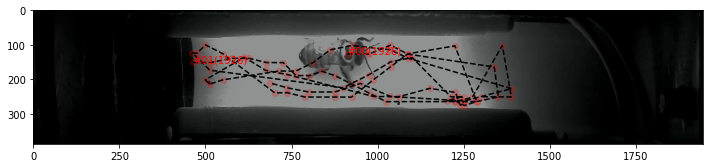

Detection/track statistics:


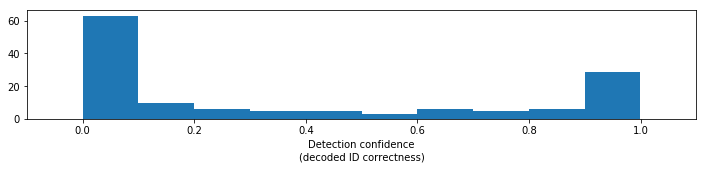

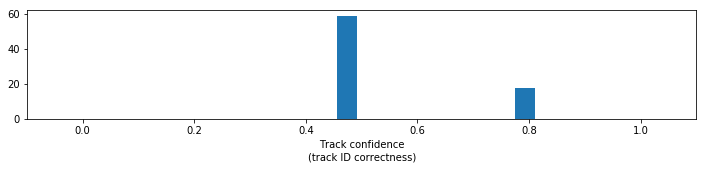

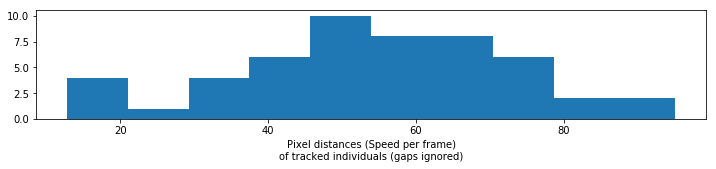

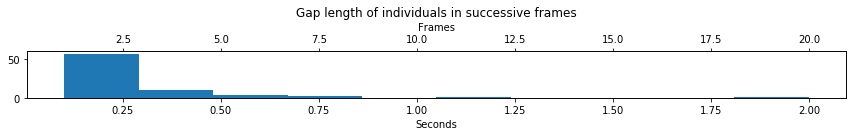

Individual statistics:


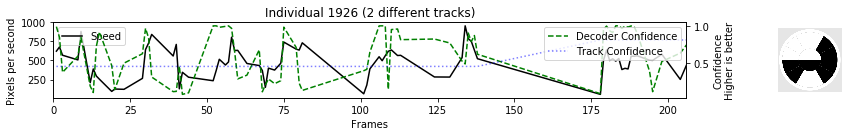

In [220]:
# hyperparameters

#e00_2018-08-19-02-20-55

tag_pixel_diameter = 50
n_frames = None
fps = 10.0
progress = "tqdm_notebook"
tracker = "../tracker.det_score_fun.frag_score_fun.dill"
confidence_filter_detections = 0.08 # 0.08
confidence_filter_tracks = 0.2 #.2
coordinate_scale = 1.0
localizer_threshold="0.50" # 50

#1944


default_pipeline = get_default_pipeline(localizer_threshold=localizer_threshold)

track_dfs = []
counter = 0
for path in ['../videos/videos_tags/e00_2018-08-19-01-08-13.h264']:  

    print(counter, ": ", path)
    
    try:

        # get the detections
        frame_info, detections = detect_markers_in_video(path,
                                                decoder_pipeline=default_pipeline,
                                                tag_pixel_diameter=tag_pixel_diameter,
                                                n_frames=n_frames,
                                                fps=fps,
                                                progress=progress)

        print(len(detections))
        # get the tracks                                           
        tracks = track_detections_dataframe(detections,
                                            tracker=tracker,
                                            confidence_filter_detections=confidence_filter_detections,
                                            confidence_filter_tracks=confidence_filter_tracks,
                                            coordinate_scale=coordinate_scale)
        
        display_tracking_results(path, frame_info, detections, tracks)

    
    except ValueError as err: #tritt auf, wenn Video leer ist. In diesem Fall: überspringe video
        print(err)
    except Exception as err:
        print(err)
        raise